In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

In [2]:
# 1. Cargar los datos (reemplaza con la ruta correcta a tu CSV)
df = pd.read_csv(rf"C:\Users\danny\Downloads\ECOPAL_presencias_variables_completas_con_nulls.csv")

# 2. Eliminar columnas no numéricas (como geometría o coordenadas si existen)
df_numeric = df.select_dtypes(include=[np.number])
df_numeric = df_numeric.drop(columns=["grupo_geografico", "mes","total_individuos","anio"])



In [3]:
df_numeric

,aspect,bio01,bio02,bio03,bio04,bio05,bio06,bio07,bio08,bio09,...,bio17,bio18,bio19,cti,elev,hillshade,landcover,slope,tri,watdist
0,297.0,252.0,81.0,71.0,1138.0,315.0,201.0,114.0,264.0,240.0,...,76.0,397.0,90.0,NaN,11,181.0,10,0.0,5.0,4.472136
1,305.0,239.0,95.0,82.0,589.0,299.0,184.0,115.0,243.0,232.0,...,76.0,377.0,76.0,5.963651,336,191.0,10,4.0,470.0,4.123106
2,216.0,223.0,107.0,90.0,241.0,285.0,167.0,118.0,221.0,223.0,...,78.0,172.0,410.0,NaN,1142,207.0,60,15.0,1139.0,1.414214
3,325.0,228.0,105.0,92.0,161.0,286.0,172.0,114.0,228.0,226.0,...,73.0,414.0,73.0,6.813216,1044,193.0,10,7.0,-1921.0,5.656854
4,341.0,225.0,109.0,90.0,214.0,287.0,166.0,121.0,222.0,223.0,...,43.0,104.0,670.0,NaN,1074,192.0,10,11.0,-252.0,20.099751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,4.0,250.0,85.0,79.0,673.0,306.0,199.0,107.0,258.0,243.0,...,201.0,1420.0,203.0,NaN,143,180.0,10,2.0,283.0,8.944272
2721,317.0,229.0,85.0,81.0,589.0,283.0,179.0,104.0,236.0,223.0,...,388.0,1657.0,437.0,6.761991,555,182.0,10,1.0,114.0,13.601471
2722,265.0,232.0,85.0,80.0,639.0,287.0,182.0,105.0,240.0,226.0,...,375.0,1733.0,401.0,6.645558,494,185.0,10,1.0,15.0,11.045361
2723,162.0,236.0,87.0,78.0,722.0,294.0,183.0,111.0,245.0,229.0,...,247.0,1682.0,247.0,6.532068,441,179.0,10,1.0,-65.0,1.000000


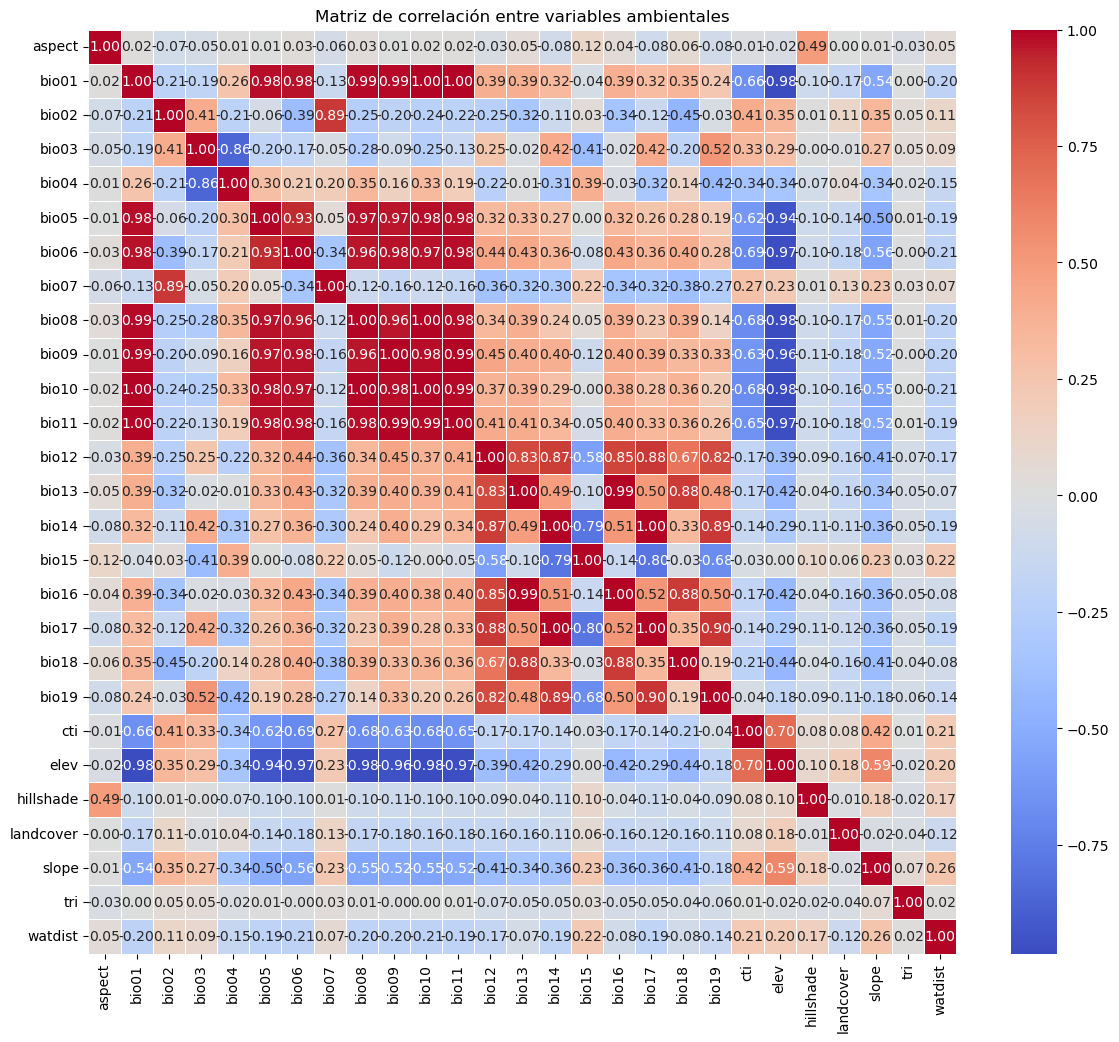

Pares de variables altamente correlacionadas (|corr| > 0.85):
      Var1   Var2  Correlation
29   bio01  bio05     0.983774
30   bio01  bio06     0.975510
32   bio01  bio08     0.990137
33   bio01  bio09     0.989951
34   bio01  bio10     0.997277
35   bio01  bio11     0.996873
45   bio01   elev    -0.977448
120  bio05  bio06     0.925637
122  bio05  bio08     0.974598
123  bio05  bio09     0.968897
124  bio05  bio10     0.982614
125  bio05  bio11     0.975499
135  bio05   elev    -0.942008
142  bio06  bio08     0.963833
143  bio06  bio09     0.975605
144  bio06  bio10     0.972422
145  bio06  bio11     0.979008
155  bio06   elev    -0.973460
180  bio08  bio09     0.963383
181  bio08  bio10     0.995530
182  bio08  bio11     0.982555
192  bio08   elev    -0.982560
198  bio09  bio10     0.980241
199  bio09  bio11     0.993122
209  bio09   elev    -0.958386
215  bio10  bio11     0.990010
225  bio10   elev    -0.983074
240  bio11   elev    -0.970955
262  bio13  bio16     0.994058
275  bio

In [11]:
# 3. Calcular matriz de correlación
corr_matrix = df_numeric.corr(method='pearson')

# 4. Mostrar heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables ambientales")
plt.show()

# 5. Detectar pares altamente correlacionados
threshold = 0.9
corr_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = corr_pairs.stack().reset_index()
high_corr.columns = ['Var1', 'Var2', 'Correlation']
high_corr_filtered = high_corr[abs(high_corr['Correlation']) > threshold]

# 6. Mostrar resultados
print("Pares de variables altamente correlacionadas (|corr| > 0.85):")
print(high_corr_filtered)


In [4]:
vars_to_keep = [
    'bio01',    # temperatura promedio anual
    'bio02', 'bio03', 'bio04',  # variables de variación
    'bio07',    # rango de temperatura anual
    'bio12',    # precipitación anual
    'bio13',    # mes más húmedo
    'bio14',    # mes más seco
    'bio15', 'bio18', 'bio19',  # índice de variabilidad
    'slope', 'aspect', 'hillshade', 'tri', 'cti', 'watdist', 'landcover',
    'especie','.geo','fecha','total_individuos'
]

df = df[vars_to_keep]


### Imputacion presencia

In [5]:
nan_percent = df.isna().mean().sort_values(ascending=False) * 100
print(nan_percent)


cti                 57.064220
slope                0.550459
hillshade            0.550459
aspect               0.550459
bio15                0.366972
bio02                0.366972
bio19                0.366972
bio18                0.366972
bio01                0.366972
bio14                0.366972
bio13                0.366972
bio12                0.366972
bio07                0.366972
bio04                0.366972
bio03                0.366972
tri                  0.000000
watdist              0.000000
landcover            0.000000
especie              0.000000
.geo                 0.000000
fecha                0.000000
total_individuos     0.000000
dtype: float64


In [7]:
# Excluir columnas no numéricas o que no deben ser imputadas
columnas_excluir = ['especie', '.geo', 'fecha','total_individuos']  

# Seleccionar solo numéricas imputables
cols_numericas = df.drop(columns=columnas_excluir).select_dtypes(include='number').columns
df_num = df[cols_numericas]

In [10]:
# Imputación inteligente con regresión bayesiana
imp = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
df_num_imputed = pd.DataFrame(imp.fit_transform(df_num), columns=df_num.columns)


C:\Users\danny\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [14]:
# Reagregar columnas excluidas (como especie, fecha, etc.)
df_final = pd.concat([df_num_imputed, df[columnas_excluir].reset_index(drop=True)], axis=1)
df_final = df_final.drop(columns = 'cti')

In [16]:
df_final.to_csv('data_presencias_final.csv')

In [13]:
df

,bio01,bio02,bio03,bio04,bio07,bio12,bio13,bio14,bio15,bio18,...,aspect,hillshade,tri,cti,watdist,landcover,especie,.geo,fecha,total_individuos
0,252.0,81.0,71.0,1138.0,114.0,783.0,153.0,23.0,72.0,397.0,...,297.0,181.0,5.0,NaN,4.472136,10,anthonyi,"{""type"":""Point"",""coordinates"":[-79.78801504321...",2017-01-26,1
1,239.0,95.0,82.0,589.0,115.0,973.0,175.0,17.0,70.0,377.0,...,305.0,191.0,470.0,5.963651,4.123106,10,anthonyi,"{""type"":""Point"",""coordinates"":[-79.71175549700...",2025-01-14,1
2,223.0,107.0,90.0,241.0,118.0,1073.0,171.0,13.0,60.0,172.0,...,216.0,207.0,1139.0,NaN,1.414214,60,anthonyi,"{""type"":""Point"",""coordinates"":[-79.41458316639...",2008-01-11,10
3,228.0,105.0,92.0,161.0,114.0,1103.0,188.0,10.0,67.0,414.0,...,325.0,193.0,-1921.0,6.813216,5.656854,10,anthonyi,"{""type"":""Point"",""coordinates"":[-79.58133570939...",2008-01-11,16
4,225.0,109.0,90.0,214.0,121.0,1262.0,241.0,7.0,84.0,104.0,...,341.0,192.0,-252.0,NaN,20.099751,10,anthonyi,"{""type"":""Point"",""coordinates"":[-79.72530224600...",2008-01-11,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2720,250.0,85.0,79.0,673.0,107.0,2769.0,543.0,53.0,75.0,1420.0,...,4.0,180.0,283.0,NaN,8.944272,10,sylvatica,"{""type"":""Point"",""coordinates"":[-79.24278292100...",2023-12-13,1
2721,229.0,85.0,81.0,589.0,104.0,3932.0,674.0,113.0,63.0,1657.0,...,317.0,182.0,114.0,6.761991,13.601471,10,sylvatica,"{""type"":""Point"",""coordinates"":[-79.06005787804...",2020-12-10,1
2722,232.0,85.0,80.0,639.0,105.0,4003.0,694.0,112.0,66.0,1733.0,...,265.0,185.0,15.0,6.645558,11.045361,10,sylvatica,"{""type"":""Point"",""coordinates"":[-79.11761595443...",2018-12-26,1
2723,236.0,87.0,78.0,722.0,111.0,3262.0,574.0,70.0,74.0,1682.0,...,162.0,179.0,-65.0,6.532068,1.000000,10,sylvatica,"{""type"":""Point"",""coordinates"":[-79.17107611696...",2024-12-18,1


### Imputacion pseudoausencias RB

In [17]:
df_pseudoausencias = pd.read_csv(rf"C:\Users\danny\Downloads\ECOPAL_RB_uniforme_filtrado_vars.csv")

In [20]:
# Excluir columnas no numéricas o que no deben ser imputadas
columnas_excluir = ['especie', '.geo', 'fecha','total_individuos','cti','system:index']  # puedes ajustar según sea necesario

# Seleccionar solo numéricas imputables
cols_numericas = df_pseudoausencias.drop(columns=columnas_excluir).select_dtypes(include='number').columns
df_num = df_pseudoausencias[cols_numericas]

In [22]:
# Imputación inteligente con regresión bayesiana
imp = IterativeImputer(estimator=BayesianRidge(), max_iter=10, random_state=42)
df_num_imputed = pd.DataFrame(imp.fit_transform(df_num), columns=df_num.columns)


C:\Users\danny\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:796: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [26]:
# Reagregar columnas excluidas (como especie, fecha, etc.)
df_final = pd.concat([df_num_imputed, df_pseudoausencias[columnas_excluir].reset_index(drop=True)], axis=1)
df_final = df_final.drop(columns = ['cti','especie','fecha','total_individuos','system:index'])
df_final.to_csv('data_pseudoausencias_final.csv')

In [28]:
nan_percent = df_final.isna().mean().sort_values(ascending=False) * 100
print(nan_percent)
df_final

aspect       0.0
bio01        0.0
watdist      0.0
tri          0.0
slope        0.0
landcover    0.0
hillshade    0.0
bio19        0.0
bio18        0.0
bio15        0.0
bio14        0.0
bio13        0.0
bio12        0.0
bio07        0.0
bio04        0.0
bio03        0.0
bio02        0.0
.geo         0.0
dtype: float64


,aspect,bio01,bio02,bio03,bio04,bio07,bio12,bio13,bio14,bio15,bio18,bio19,hillshade,landcover,slope,tri,watdist,.geo
0,39.0,248.000000,99.000000,87.000000,487.000000,113.000000,3200.000000,349.000000,191.000000,19.000000,827.000000,822.00000,178.0,10.0,1.0,-10.0,23.259407,"{""type"":""Point"",""coordinates"":[-76.90623307730..."
1,101.0,165.000000,97.000000,84.000000,214.000000,115.000000,2369.000000,381.000000,48.000000,64.000000,966.000000,216.00000,146.0,10.0,11.0,273.0,14.142136,"{""type"":""Point"",""coordinates"":[-78.97786795992..."
2,231.0,227.000000,98.000000,83.000000,585.000000,118.000000,2290.000000,244.000000,125.000000,20.000000,471.000000,627.00000,183.0,10.0,1.0,17.0,3.000000,"{""type"":""Point"",""coordinates"":[-78.15943379237..."
3,224.0,225.000000,99.000000,87.000000,420.000000,113.000000,4179.000000,466.000000,221.000000,19.000000,1047.000000,1136.00000,201.0,10.0,10.0,-261.0,32.449961,"{""type"":""Point"",""coordinates"":[-77.64129666686..."
4,196.0,248.000000,92.000000,70.000000,1298.000000,131.000000,498.000000,141.000000,4.000000,114.000000,319.000000,21.00000,181.0,10.0,1.0,-23.0,2.000000,"{""type"":""Point"",""coordinates"":[-80.25804181112..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,161.0,89.000000,105.000000,89.000000,219.000000,117.000000,792.000000,105.000000,43.000000,28.000000,147.000000,164.00000,167.0,30.0,13.0,1047.0,8.944272,"{""type"":""Point"",""coordinates"":[-78.57268484805..."
5996,162.0,219.000000,128.000000,90.000000,269.000000,142.000000,1053.000000,268.000000,4.000000,107.000000,653.000000,27.00000,167.0,10.0,14.0,-1538.0,15.000000,"{""type"":""Point"",""coordinates"":[-79.90191230634..."
5997,120.0,120.000000,105.000000,86.000000,377.000000,121.000000,1099.000000,141.000000,58.000000,28.000000,256.000000,208.00000,150.0,10.0,11.0,-1111.0,27.166155,"{""type"":""Point"",""coordinates"":[-78.99839742530..."
5998,330.0,156.000000,119.000000,86.000000,438.000000,137.000000,2475.000000,373.000000,104.000000,38.000000,442.000000,925.00000,202.0,10.0,14.0,-760.0,7.615773,"{""type"":""Point"",""coordinates"":[-78.31961860379..."
